In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import os


# for each congress, get the following data and store the congress # as a column
# Create empty dataframes to store the data for each congress
results_df = pd.DataFrame()
hearing_data_df = pd.DataFrame()
members_df = pd.DataFrame()

# Iterate over each congress
for congress in range(113,119):
    # Read the data for the current congress
    results = pd.read_csv(str(congress) + "/results.csv")
    hearing_data = pd.read_csv(str(congress) + "/hearings.csv")
    members = pd.read_csv(str(congress) + "/assignments.csv", index_col=0)
    
    # Add the congress number as a column
    results['Congress'] = congress
    hearing_data['Congress'] = congress
    members['Congress'] = congress
    
    # Append the data to the respective dataframes
    results_df = pd.concat([results_df, results])
    hearing_data_df = pd.concat([hearing_data_df, hearing_data])
    members_df = pd.concat([members_df, members])

# Reset the index of the dataframes
results_df.reset_index(drop=True, inplace=True)
hearing_data_df.reset_index(drop=True, inplace=True)
members_df.reset_index(drop=True, inplace=True)

results = results_df
hearing_data = hearing_data_df



In [4]:
#reformatting dates
from datetime import datetime
import pandas as pd 

#results df
try:
    results["Date"] = [datetime.strptime(string, '%A, %B %d, %Y') for string in results["Date"]]
except:
    pass
results ["Month"] = [d.month for d in results["Date"]]
results ["Year"] = [d.year for d in results["Date"]]
results["Quarter"] = [(m-1)//3 + 1 for m in results["Month"]]

#hearings df
try:
    hearing_data["Date"] = [datetime.strptime(string, '%A, %B %d, %Y') for string in hearing_data["Date"]]
except:
    pass
hearing_data ["Month"] = [d.month for d in hearing_data["Date"]]
hearing_data ["Year"] = [d.year for d in hearing_data["Date"]]
hearing_data["Quarter"] = [(m-1)//3 + 1 for m in hearing_data["Month"]]

#setting up dataframes
conflictsxhearings_quarter = pd.DataFrame(columns=["year","quarter","conflicts","hearings"])


unique_years = hearing_data["Year"].unique()

#for each year in the congress
for year in unique_years:
    for q in range(1,5):
        try:
            conflicts = results[results["Year"]==year]["Quarter"].value_counts()[q]
            hearings = hearing_data[hearing_data["Year"]==year]["Quarter"].value_counts()[q]
            res = pd.DataFrame([[year,q,conflicts,hearings]],columns = ["year","quarter","conflicts","hearings"])
            conflictsxhearings_quarter = pd.concat([conflictsxhearings_quarter, res])
        except:
            continue

print("\nConflicts per hearing per quarter")
display(conflictsxhearings_quarter)

# conflictsxhearings_quarter.to_csv(directory + "/conflicts_by_hearing_quarter.csv")

# summarize conflicts by year
conflicts_by_year = pd.DataFrame(results["Year"].value_counts())
#save to directory
conflicts_by_year.to_csv("113-118_conflicts_by_year.csv")
conflictsxhearings_quarter.to_csv("113-118_conflicts_by_hearing_quarter.csv")


Conflicts per hearing per quarter


,year,quarter,conflicts,hearings
0,2013,1,1532,307
0,2013,2,2051,506
0,2013,3,949,253
0,2013,4,856,225
0,2014,1,1455,338
0,2014,2,1974,422
0,2014,3,1151,260
0,2014,4,172,83
0,2015,1,2406,429
0,2015,2,2106,426


In [14]:
 # group results by congress and year
conflicts_congress = results.groupby(["Congress","Year"]).count()["MC"].reset_index()
conflicts_congress.to_csv('113-118_conflicts_by_congress.csv')

In [12]:
# convert conflicts congress to long format where the first year of a congress is in a "first session" column adn the second year is in a "second session" column


,Congress,Year,MC
0,113,2013,5388
1,113,2014,4752
2,114,2015,6921
3,114,2016,4954
4,115,2017,4826
5,115,2018,4195
6,116,2019,7107
7,116,2020,2320
8,117,2021,3355
9,117,2022,3571


<Axes: title={'center': 'Hearings per year'}, xlabel='year'>

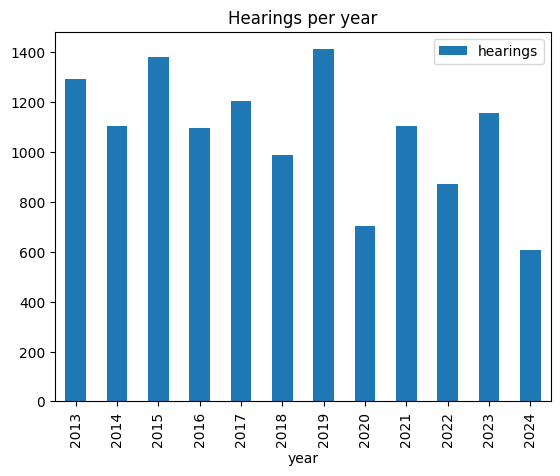

In [7]:
conflictsxhearings_quarter[["year","hearings"]].groupby("year").sum().reset_index().plot(x="year",y="hearings",kind="bar",title="Hearings per year")


<Axes: title={'center': 'Conflicts per hearing by year'}, xlabel='year'>

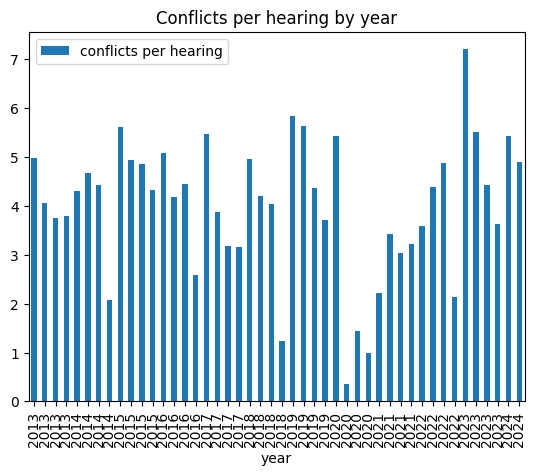

In [8]:
conflictsxhearings_quarter["conflicts per hearing"] = conflictsxhearings_quarter["conflicts"]/conflictsxhearings_quarter["hearings"]
#plot conflicts per hearing
conflictsxhearings_quarter[["year","quarter","conflicts per hearing"]].plot(x="year",y="conflicts per hearing",kind="bar",title="Conflicts per hearing by year")
# conflictsxhearings_quarter


In [9]:
conflicts_by_year
#sort by year and then plot a bar chart
conflicts_by_year = conflicts_by_year.sort_index()
display(conflicts_by_year)

#bar chart for 'conflicts' column
conflicts_by_year.plot(kind='bar', y='hearings', legend=False)

,count
Year,
2013,5388
2014,4752
2015,6921
2016,4954
2017,4826
2018,4195
2019,7107
2020,2320
2021,3355


KeyError: 'hearings'

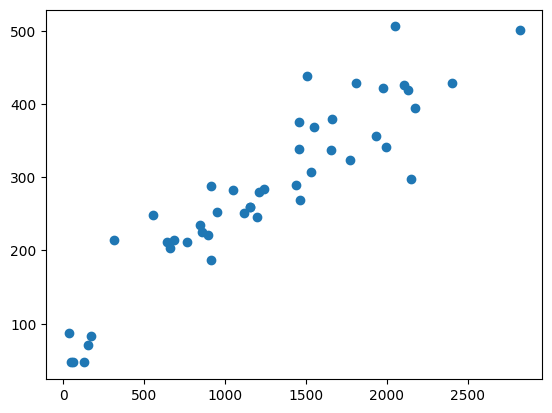

In [ ]:
conflictsxhearings_quarter

#make a scatter plot
plt.scatter(conflictsxhearings_quarter["conflicts"],conflictsxhearings_quarter["hearings"])